In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
# SPSS 통계 패키지 전용 파일 데이터 불러오기
raw_welfare = pd.read_spss('week9_Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()
# 코드북을 참조하여 분석에 사용할 7개 변수명을 알기쉬운 단어로 변경  
welfare = welfare.rename(
   columns = {'h14_g3'     : 'sex',              # 성별
              'h14_g4'     : 'birth',            # 태어난 연도
              'h14_g10'    : 'marriage_type',    # 혼인 상태
              'h14_g11'    : 'religion',         # 종교
              'p1402_8aq1' : 'income',           # 일한달의 월 평균 임금
              'h14_eco9'   : 'code_job',         # 직종
              'h14_reg7'   : 'code_region'       # 7개 권역별 지역 구분
             })
# 바뀐 변수명으로 데이터 확인
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'code_region']].head(1)

sex   birth  marriage_type  religion  income  code_job  code_region
0  2.0  1945.0            2.0       1.0     NaN       NaN          1.0

In [8]:
# 1. welfare['sex'] -> 1 : male, 2 : female
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
# welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'code_region']].head(1)
# 2. welfare['age'] = 2019 - welfare['birth'] + 1
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
# welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'code_region', 'age', 'ageg']].head(1)
# 3. 연령대. 30이하 young, 30-60 middle, 60이상 old
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young', 
                                np.where(welfare['age'] <= 59, 'middle', 'old')))
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'code_region', 'age', 'ageg']].head(1)

sex   birth  marriage_type  religion  income  code_job  code_region  \
0  female  1945.0            2.0       1.0     NaN       NaN          1.0   

    age ageg  
0  75.0  old

In [10]:
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'code_region', 'age', 'ageg']].head(1)
# 9-6 직업별 월급 차이 - 어떤 직업이 월글을 가장 많이 받을까?
# 직업 변수 -> NaN ?, 직업 코드 의미?
# 월급 분석 -> NaN?, dropna, 분포?
# 관계 -> groupby 등등

sex   birth  marriage_type  religion  income  code_job  code_region  \
0  female  1945.0            2.0       1.0     NaN       NaN          1.0   

    age ageg  
0  75.0  old

In [12]:
welfare['code_job'].isna().sum() # 7540
welfare['code_job'].unique()
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [14]:
list_job = pd.read_excel('week9_Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
# list_job.head()

In [16]:
welfare = pd.merge(welfare, list_job, how = 'left', on = 'code_job')
welfare[['job', 'code_job']].head()

job  code_job
0          NaN       NaN
1          NaN       NaN
2          전기공     762.0
3  금속기계 부품 조립원     855.0
4          NaN       NaN

In [18]:
welfare['income'].isna().sum()
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='평균월급', ylabel='job'>

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


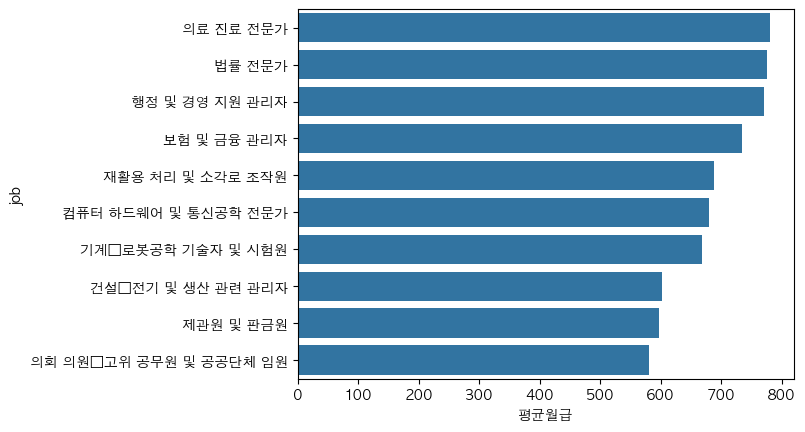

In [20]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'AppleGothic'})
# 직업 없는 사람 빼고, 월급 없는 사람 빼고
# 직업 묶어서 각 평균 월급을 찾는다
result = welfare.dropna(subset=['job', 'income'])\
                .groupby('job').agg(평균월급 = ('income', 'mean'),
                                     최대월급 = ('income', 'max'),
                                      최소월급 = ('income', 'min'),
                                      사람수 = ('job', 'count'))\
                .sort_values('평균월급', ascending=False).head(10)
sns.barplot(data = result, y = 'job', x = '평균월급')

<Axes: xlabel='여자직업선호도', ylabel='job'>

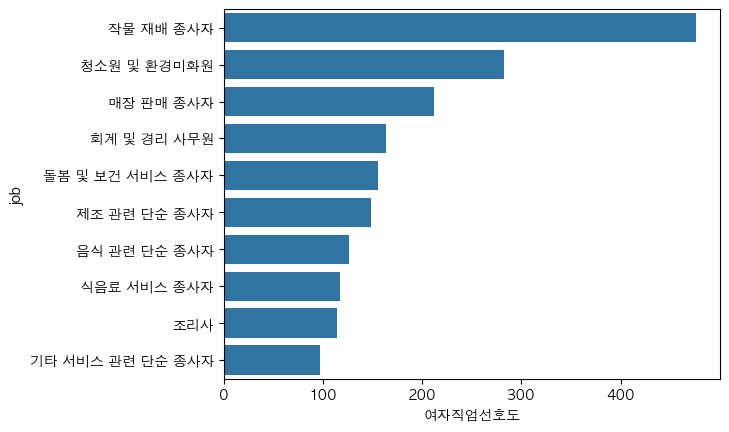

In [24]:
# 1. 여자들의 데이터, 가장 많은 사람이 선택한 직업 10개 고르기
resultFemale = welfare.dropna(subset='job').query('sex == "female"')\
                .groupby('job').agg(여자직업선호도 = ('job', 'count'))\
                .sort_values('여자직업선호도', ascending=False).head(10)
sns.barplot(data = resultFemale, x = '여자직업선호도', y = 'job')
# 2. 남자들 중에 가장 많은 사람이 선택한 직업 10개 고르기
# -> 그래프도 그리기
# -> streamlit으로 변경해서 작성하기
# 1.1 side bar -> select box 여자 직업 선호도, 남자 직업 선호도 찾기
# 1.2 같은 페이지에 여자, 남자 값을 변수로 받아서 query에 직접 넣기

In [223]:
# 2. 남자들 중에 가장 많은 사람이 선택한 직업 10개 고르기
resultMale = welfare.dropna(subset='job').query('sex == "male"')\
                .groupby('job').agg(남자직업선호도 = ('job', 'count'))\
                .sort_values('남자직업선호도', ascending=False).head(10)
sns.barplot(data = resultMale, x = '남자직업선호도', y = 'job')

<Axes: xlabel='남자직업선호도', ylabel='job'>